# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

### Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [2]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

The dataset is having 614 rows and 13 columns

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can observe that most of the columns are having null values that we need to fill with appropriate method

In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [7]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [9]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
#Separating columns with null values in Categorical 
null_cols_cat=['Gender','Married','Dependents','Self_Employed','Credit_History','Loan_Amount_Term']

In [11]:
#Separating columns with null values in Continous 

null_cols_cont=['LoanAmount']

In [12]:
for i in df[null_cols_cat]:
    df[i]=df[i].fillna(df[i].mode()[0])

Filling Nan with mode() of that particular columns as they are categorical

In [13]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

Repalcing Nan values with mean()

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can observe that all Null values are replaced

In [15]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Description of Dataset

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


We can observe that there are no null values in the dataset

Columns(Applicantincome,LoanAmount) is highly skewed to right

Columns(Loan_Amount_Term,Credit_History) are categorical numerical.

### Lets separating categorical varibale and continous varibales¶

In [17]:
#Checking for Categorical columns
Cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        Cat_col.append(i)
print(Cat_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [18]:
# Checking for Continous columns
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print(num_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# EDA

Male      502
Female    112
Name: Gender, dtype: int64


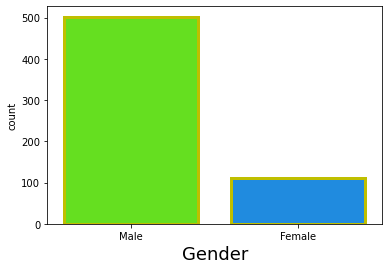

In [19]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Gender',data=df,edgecolor="y",linewidth=3,palette="gist_rainbow")
plt.xlabel('Gender',fontsize=18)
print(df['Gender'].value_counts())

There are more number of Male applicants than Female applicants. The total number of male applicants are 502 whereas female numbers are just 112.

Yes    401
No     213
Name: Married, dtype: int64


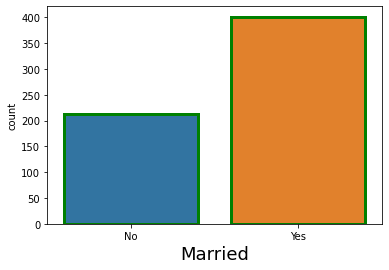

In [20]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Married',data=df,edgecolor="g",linewidth=3)
plt.xlabel('Married',fontsize=18)
print(df['Married'].value_counts())

The number of married applicants who have applied for loan are 401 whereas the unmarried applicants are 213.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


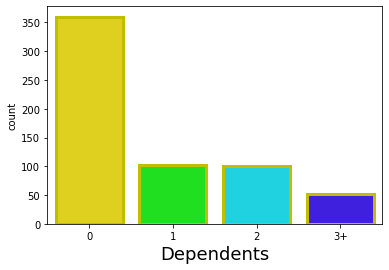

In [21]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Dependents',data=df,edgecolor="y",linewidth=3,palette="gist_rainbow")
plt.xlabel('Dependents',fontsize=18)
print(df['Dependents'].value_counts())

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


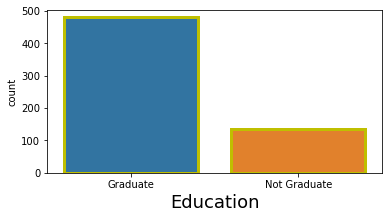

In [22]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x='Education',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Education',fontsize=18)
print(df['Education'].value_counts())

The count of Graduate applicants is high in counts means the maximum number of Graduated applicants are applying for the loan.

No     532
Yes     82
Name: Self_Employed, dtype: int64


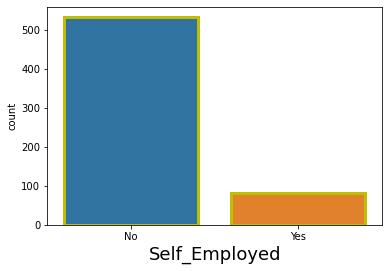

In [23]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Self_Employed',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Self_Employed',fontsize=18)
print(df['Self_Employed'].value_counts())

 Most of the applicants or not self employed that means they might working in the public sectors and only 82 applicants are self employed and running their own bussiness.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


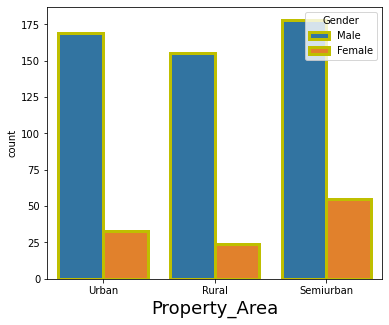

In [24]:
plt.figure(figsize=(6,5))
ax=sns.countplot(x='Property_Area',hue='Gender',data=df,edgecolor="y",linewidth=3)
plt.xlabel('Property_Area',fontsize=18)
print(df['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


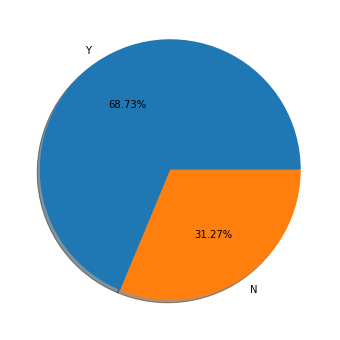

In [25]:
print(df['Loan_Status'].value_counts())
labels='Y','N'
fig,ax = plt.subplots(figsize=(10,6))
ax.pie(df['Loan_Status'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

The count of "Y" is maximum caompare to "N" that means total 422 applicants get their loan and only 192 applicants gets denied.

We can also notice the imbalance of the class, and it needs to get balance using over_sampling method to increase the instances of minority class.

In [26]:
df_cont=df[num_col]

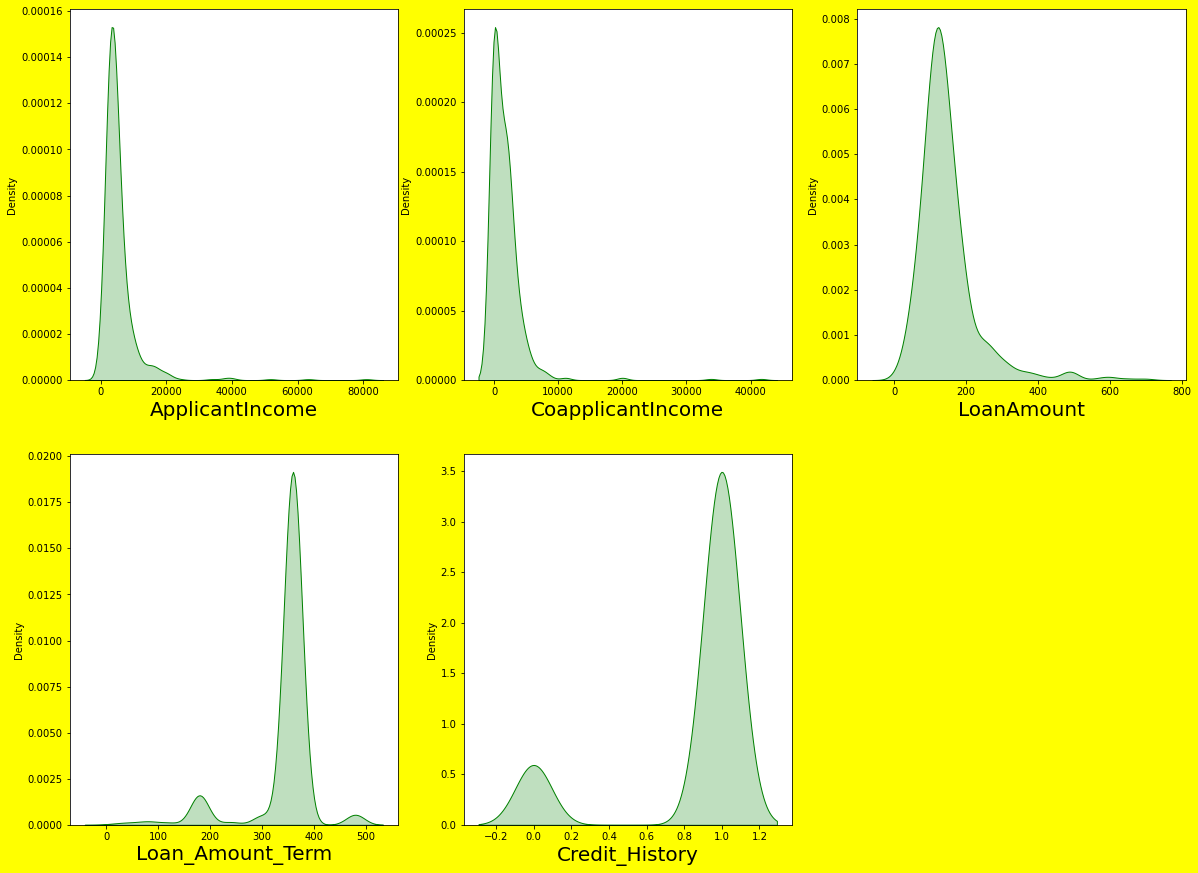

In [27]:
#Lets check the distribution of continous columns
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df_cont:
    if plotnumber<=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df_cont[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can observe that 

columns(Applicant_Income,Coapplicant_Income,Loan Amount) are skewed to right

columns(Loan_Amount_Term,Credit_History) skewed to left

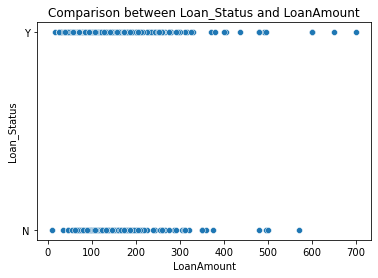

In [28]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and LoanAmount")
sns.scatterplot(df['LoanAmount'],df['Loan_Status'],data = df)
plt.xlabel("LoanAmount")
plt.ylabel("Loan_Status")
plt.show()

We can observe that LoanAmount is continous till 400.

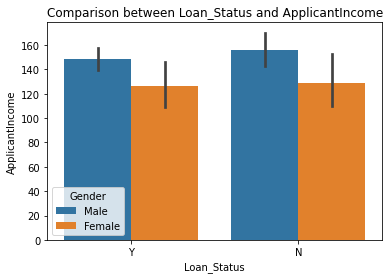

In [29]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and ApplicantIncome")
sns.barplot(df['Loan_Status'],df['LoanAmount'],hue='Gender',data = df)
plt.ylabel("ApplicantIncome")
plt.xlabel("Loan_Status")
plt.show()

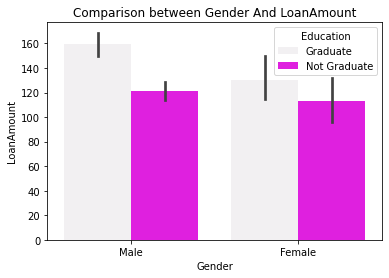

In [30]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Gender And LoanAmount")
sns.barplot(df['Gender'],df['LoanAmount'],data = df,hue='Education',color='Magenta')
plt.ylabel("LoanAmount")
plt.xlabel("Gender")
plt.show()

We can observe that LoanAmount is more in males which are graduated

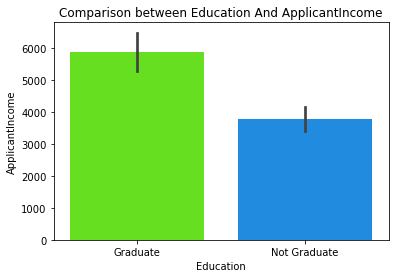

In [31]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Education And ApplicantIncome")
sns.barplot(df['Education'],df['ApplicantIncome'],data = df,palette="gist_rainbow")
plt.ylabel("ApplicantIncome")
plt.xlabel("Education")
plt.show()

We can observe that income is more in Graduates candidated

<AxesSubplot:>

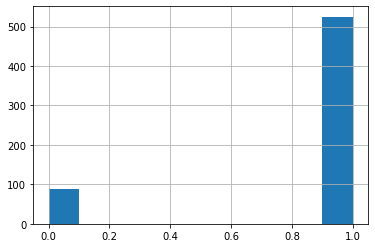

In [32]:
df['Credit_History'].hist()

We can observe that Loan sactioned frequency is more than denials

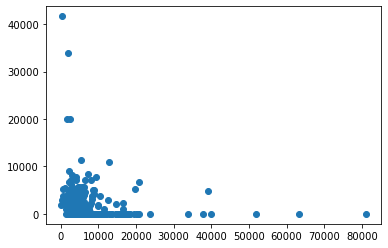

In [33]:
plt.scatter(df['ApplicantIncome'],df['CoapplicantIncome'])

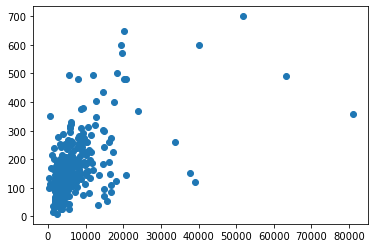

In [34]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])

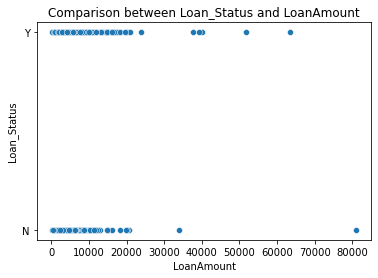

In [35]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and LoanAmount")
sns.scatterplot(df['ApplicantIncome'],df['Loan_Status'],data = df)
plt.xlabel("LoanAmount")
plt.ylabel("Loan_Status")
plt.show()

LoanAmount is continous till 20k.

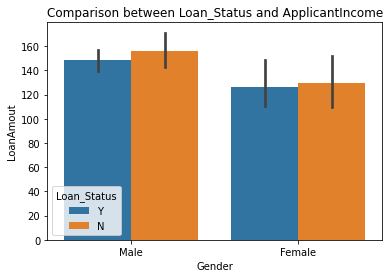

In [36]:
plt.figure(figsize=(6,4))
plt.title("Comparison between Loan_Status and ApplicantIncome")
sns.barplot(df['Gender'],df['LoanAmount'],hue='Loan_Status',data = df)
plt.ylabel("LoanAmout")
plt.xlabel("Gender")
plt.show()

We can observe that in males loan amount is more than females

### Now using encoder to encode the target variable

In [37]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
df=df.drop(columns=['Loan_ID'],axis=1)


In [39]:
Cat_col.remove("Loan_ID")

In [40]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()

for i in Cat_col:
    df[i]=enc.fit_transform(df[i])
    


In [41]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

We can observe that all categorical columns are encoded into numerical

# Checking for Corrrelation

### Plotting heatmap

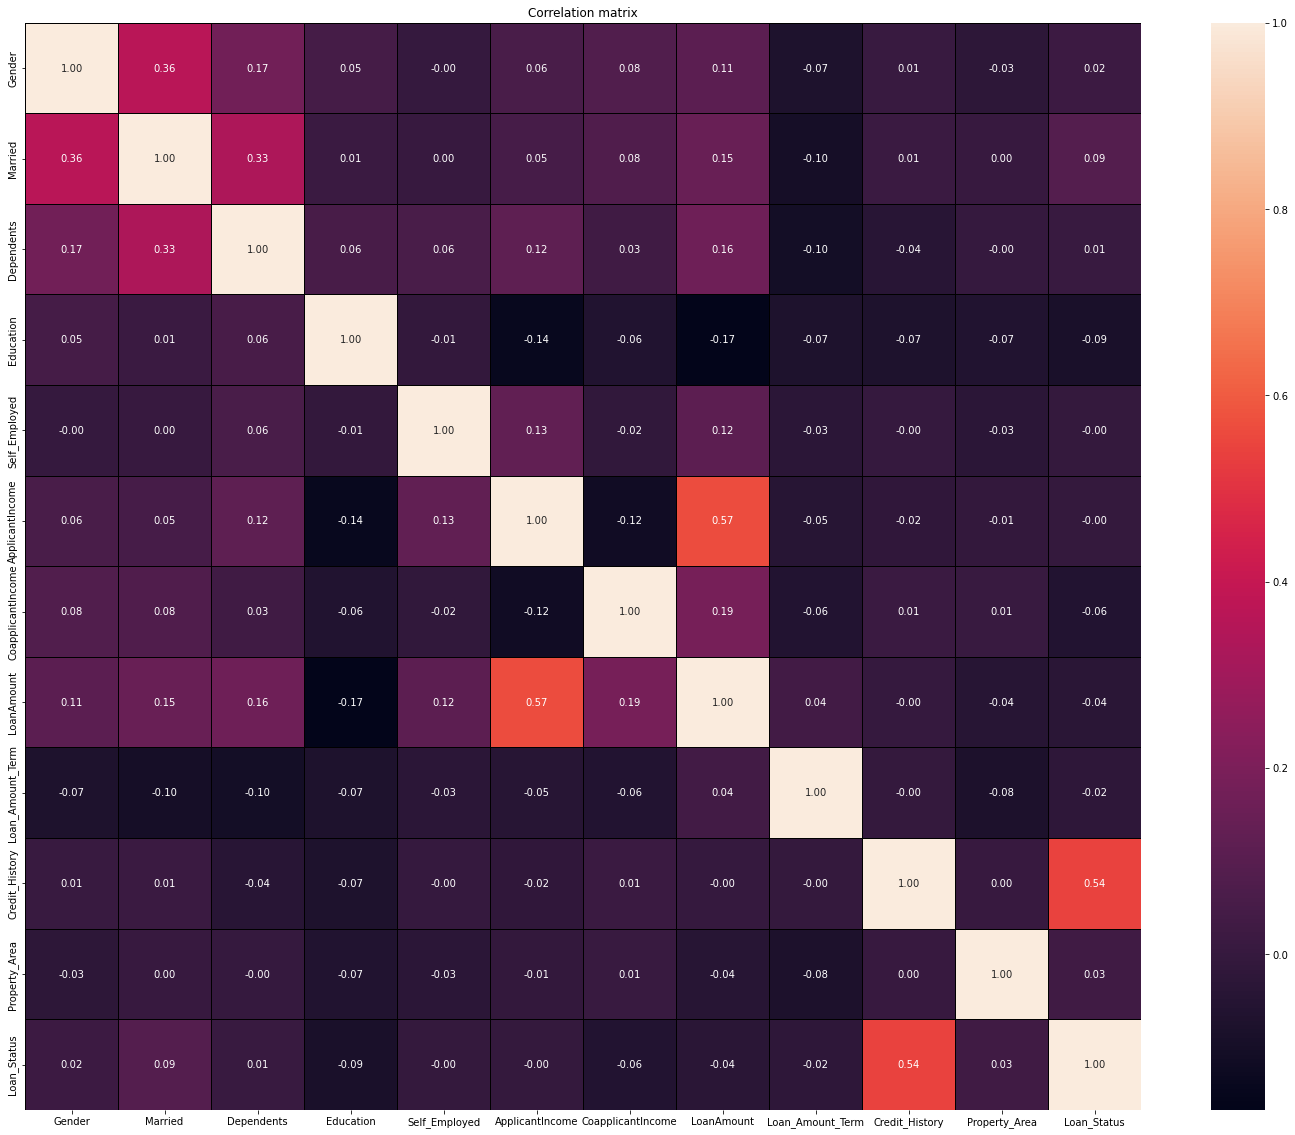

In [42]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')
plt.title("Correlation matrix")
plt.savefig('Correlation matrix.jpg')
plt.show()

We can observe that :-

1)The heatmap contains both positive and negative corelation.

2)there is no multicolinearity problem in this dataset.

3)The feartures except Credit_History are very having very less relationship very target variable.

4) We can observe that column 'Credit_History' has highest relationship with target variable.

5) Features (Self_Employed and ApplicantIncome ) have no relationship with the target variable, so we can remove them

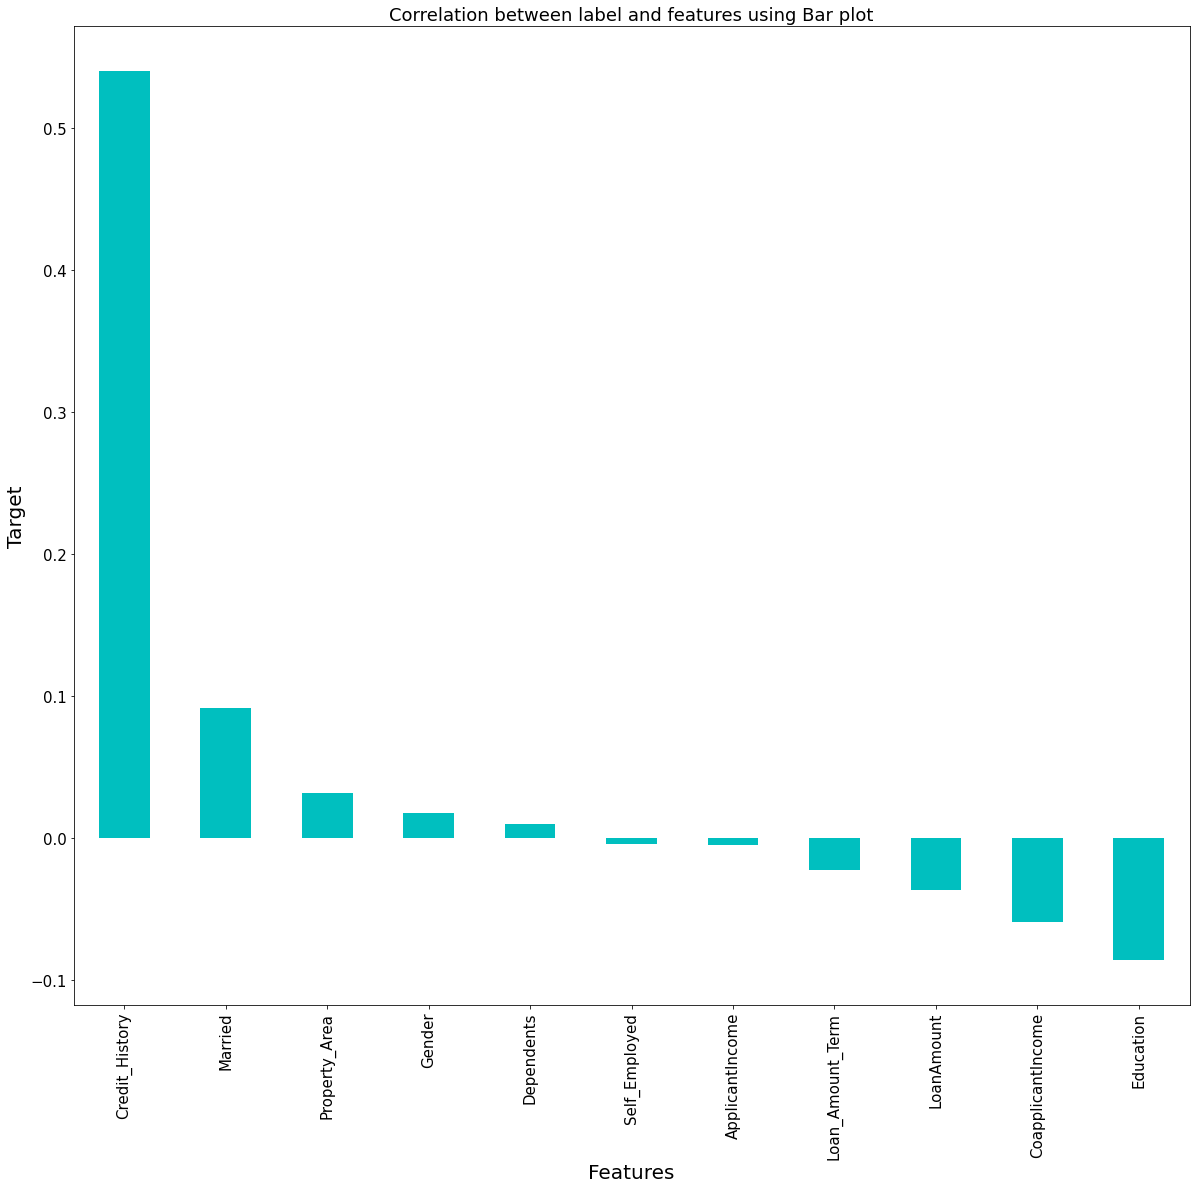

In [43]:
plt.figure(figsize=(20,18))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c',fontsize=15)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between label and features using Bar plot',fontsize=18)
plt.show()

POSITEVLY CORELATED COLUMN-:

['Credit_History', 'Married', 'Property_Area', 'Dependents']

NEGATIVELY CORELATED COLUMN-:

['Loan_Amount_Term', 'LoanAmount',  'CoapplicantIncome', 'Education']

# Checking Skewess

In [44]:
df_cont.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

We can see that all columns are highly skewed
    
Setting skewness limit to -0.65to +0.65

# Checking for Outliers

In [45]:
df_cont.shape

(614, 5)

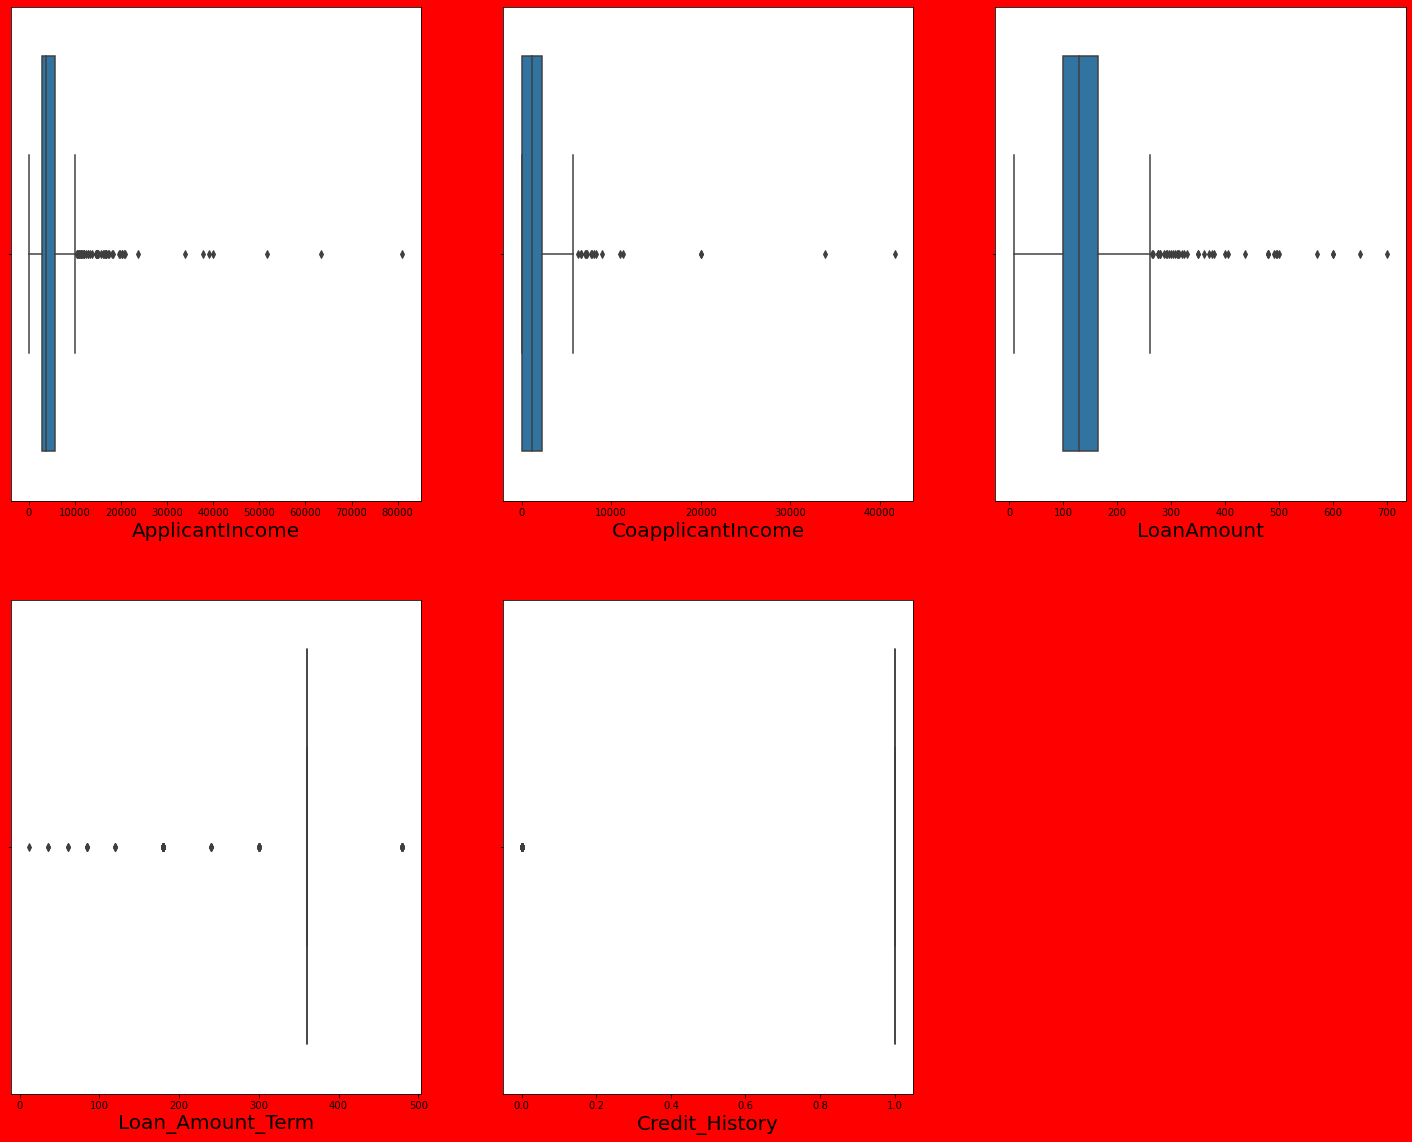

In [46]:
plt.figure(figsize=(25,20),facecolor= 'red')
plotnumber = 1


for column in df_cont:
    if plotnumber<=5:
        plt.subplot(2,3,plotnumber)
        ax=sns.boxplot(df_cont[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

We can observe that all columns are having outliers

In [47]:
df=df.drop(columns=['Self_Employed','ApplicantIncome'],axis=1)

Dropping columns having no relationship with target variable

In [48]:
df

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0.0,187.000000,360.0,1.0,2,1


# DataPreprocessing

### Removing Outliers using Z-technique

In [49]:
df_cont.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [50]:
num_col.remove("ApplicantIncome")


In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_col]))
z.shape
z

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.554487,0.000000,0.273231,0.411733
1,0.038732,0.219273,0.273231,0.411733
2,0.554487,0.957641,0.273231,0.411733
3,0.251980,0.314547,0.273231,0.411733
4,0.554487,0.064454,0.273231,0.411733
...,...,...,...,...
609,0.554487,0.898095,0.273231,0.411733
610,0.554487,1.267279,2.522836,0.411733
611,0.472404,1.269371,0.273231,0.411733
612,0.554487,0.483367,0.273231,0.411733


In [52]:
df_new=df[(z<3).all(axis=1)]
print("old dataframe",df.shape)
print("new dataframe",df_new.shape)
print("total number of rows dropped",df.shape[0]-df_new.shape[0])

old dataframe (614, 10)
new dataframe (582, 10)
total number of rows dropped 32


We can observe that total number of rows dropped is 32

### Percentage data loss

In [53]:
loss_percent=(614-582)/582*100
loss_percent


5.498281786941581

 We can see that data loss is less than 10%.So its safe to remove outliers

### Separating features and target variable as x and y

In [54]:
x=df_new.drop(columns=['Loan_Status'],axis=1)
y=df_new['Loan_Status']

In [55]:
print(x.shape)
print(y.shape)

(582, 9)
(582,)


# Handling imbalanced dataset

In [56]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

 We can observe that dataset is imbalanced , we need to balance it

### Over sampling using SMOTE

In [57]:
import sys
from collections import Counter
import joblib
import six
from sklearn.model_selection import train_test_split
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.model_selection import train_test_split

In [58]:
from imblearn.over_sampling import SMOTE

over_smpl=SMOTE(0.8)
x,y=over_smpl.fit_resample(x,y)

y.value_counts()

1    401
0    320
Name: Loan_Status, dtype: int64

# Removing skewness using data transforamtion

In [59]:
from sklearn.preprocessing import power_transform

x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.52760667, -1.22971343, -0.79456841, ...,  0.10970355,
         0.56696764,  1.25388913],
       [ 0.52760667,  0.81319759,  0.9718355 , ...,  0.10970355,
         0.56696764, -1.27689565],
       [ 0.52760667,  0.81319759, -0.79456841, ...,  0.10970355,
         0.56696764,  1.25388913],
       ...,
       [-1.89535134, -1.22971343, -0.79456841, ...,  4.13199113,
        -0.21545863,  1.25388913],
       [-1.89535134,  0.81319759,  1.39199708, ...,  0.10970355,
        -0.30037518,  0.14749615],
       [ 0.52760667,  0.81319759, -0.79456841, ...,  0.10970355,
         0.56696764, -1.27689565]])

In [60]:
x=pd.DataFrame(x_new,columns=x.columns)

In [61]:
x.skew()

Gender              -1.370598
Married             -0.417385
Dependents           0.510648
Education            1.516220
CoapplicantIncome   -0.150947
LoanAmount           0.042562
Loan_Amount_Term     0.664124
Credit_History      -1.249143
Property_Area       -0.111897
dtype: float64

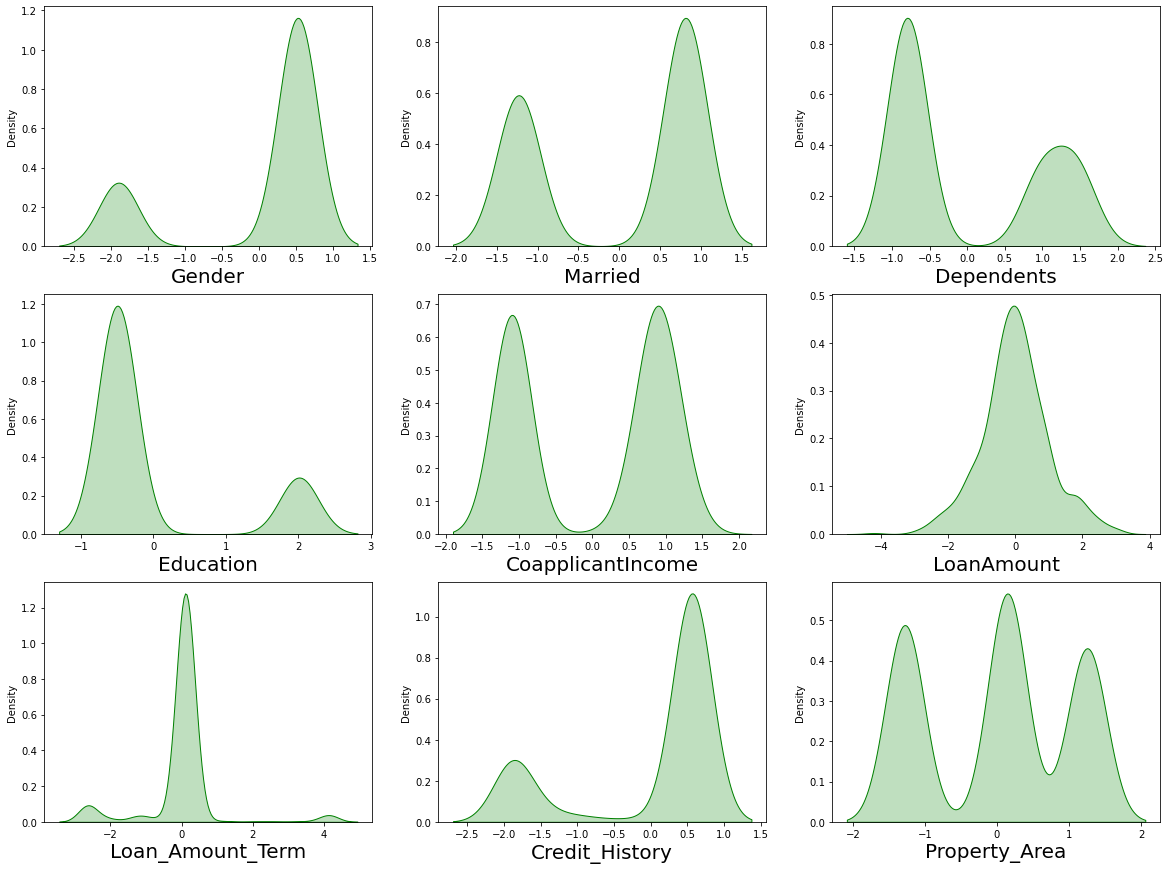

In [62]:
#Lets check the distribution of continous columns after datatransformation
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

We can observe that skewness is removed

# Data Standardisation

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.527607,-1.229713,-0.794568,-0.497398,-1.096292,0.282989,0.109704,0.566968,1.253889
1,0.527607,0.813198,0.971836,-0.497398,0.770185,-0.044000,0.109704,0.566968,-1.276896
2,0.527607,0.813198,-0.794568,-0.497398,-1.096292,-1.459197,0.109704,0.566968,1.253889
3,0.527607,0.813198,-0.794568,2.010462,0.912948,-0.195947,0.109704,0.566968,1.253889
4,0.527607,-1.229713,-0.794568,-0.497398,-1.096292,0.189881,0.109704,0.566968,1.253889
...,...,...,...,...,...,...,...,...,...
716,0.527607,0.813198,-0.794568,-0.497398,0.941064,0.701897,0.109704,0.566968,0.147496
717,0.527607,0.813198,-0.794568,-0.497398,0.744724,-1.170519,0.109704,-0.634456,-1.276896
718,-1.895351,-1.229713,-0.794568,-0.497398,-1.096292,-0.266000,4.131991,-0.215459,1.253889
719,-1.895351,0.813198,1.391997,-0.497398,0.840088,0.546450,0.109704,-0.300375,0.147496


# Check for multicollierinity

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif1']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif

,vif1,features
0,1.235217,Gender
1,1.461803,Married
2,1.172491,Dependents
3,1.046203,Education
4,1.210412,CoapplicantIncome
5,1.129429,LoanAmount
6,1.033277,Loan_Amount_Term
7,1.018503,Credit_History
8,1.028317,Property_Area


 We can see that VIF value is less than 5 for all columns .So there is no multicollinearity

# Model Training and Building

## Support Vector Machine(SVM)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

### Finding the best random state

In [66]:
max_acc=0
max_rs=0

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    svm=SVC()
    svm.fit(x_train,y_train)
    pred_svm=svm.predict(x_test)
    accuracy=accuracy_score(y_test,pred_svm)
    print('Testing accuracy', accuracy,'random state',i)
    
    if accuracy>max_acc:
        max_acc=accuracy
        max_rs=i
        print('max_accuracy',max_acc,'max_random_state',i)
        

Testing accuracy 0.7793103448275862 random state 0
max_accuracy 0.7793103448275862 max_random_state 0
Testing accuracy 0.8275862068965517 random state 1
max_accuracy 0.8275862068965517 max_random_state 1
Testing accuracy 0.7586206896551724 random state 2
Testing accuracy 0.8206896551724138 random state 3
Testing accuracy 0.8137931034482758 random state 4
Testing accuracy 0.8344827586206897 random state 5
max_accuracy 0.8344827586206897 max_random_state 5
Testing accuracy 0.8068965517241379 random state 6
Testing accuracy 0.8344827586206897 random state 7
Testing accuracy 0.7310344827586207 random state 8
Testing accuracy 0.8137931034482758 random state 9
Testing accuracy 0.8344827586206897 random state 10
Testing accuracy 0.8068965517241379 random state 11
Testing accuracy 0.8344827586206897 random state 12
Testing accuracy 0.8206896551724138 random state 13
Testing accuracy 0.7793103448275862 random state 14
Testing accuracy 0.8 random state 15
Testing accuracy 0.8068965517241379 rand

We are getting maximum accuracy at random state 41



In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=41,test_size=0.20)


In [69]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print(f"Accuracy score in training:{accuracy_score(y_train,y_pred)*100:2f}%")
        
    elif train==False:
        pred=clf.predict(x_test)
        print(f"Accuracy score in testing:{accuracy_score(y_test,pred)*100:2f}%")
        
        print("Classification report\n",classification_report(y_test,pred,digits=2))

In [70]:
svm.fit(x_train,y_train)

SVC()

In [71]:
metric_score(svm,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:80.381944%


In [72]:
metric_score(svm,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:85.517241%
Classification report
               precision    recall  f1-score   support

           0       0.90      0.73      0.80        59
           1       0.84      0.94      0.89        86

    accuracy                           0.86       145
   macro avg       0.87      0.84      0.84       145
weighted avg       0.86      0.86      0.85       145



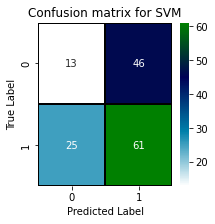

In [73]:
# Lets plot confusion matrix for SVM
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_svm)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for SVM")
plt.show()


## Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf=RandomForestClassifier()

In [76]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:99.826389%


In [78]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:84.827586%
Classification report
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        59
           1       0.91      0.83      0.87        86

    accuracy                           0.85       145
   macro avg       0.84      0.85      0.85       145
weighted avg       0.86      0.85      0.85       145



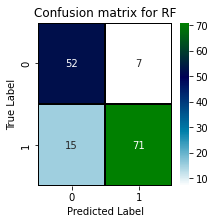

In [79]:
# Lets plot confusion matrix for SVM
pred_rf=rf.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_rf)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for RF")
plt.show()


## KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn=KNeighborsClassifier()

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
metric_score(knn,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:81.944444%


In [84]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:77.241379%
Classification report
               precision    recall  f1-score   support

           0       0.68      0.83      0.75        59
           1       0.86      0.73      0.79        86

    accuracy                           0.77       145
   macro avg       0.77      0.78      0.77       145
weighted avg       0.79      0.77      0.77       145



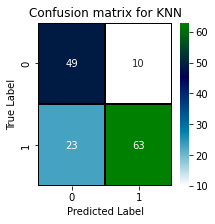

In [85]:
# Lets plot confusion matrix for KNN
pred_knn=knn.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_knn)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for KNN")
plt.show()


## Ada Boosting

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
ada=AdaBoostClassifier()

In [88]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [89]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:80.555556%


In [90]:
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:86.896552%
Classification report
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        59
           1       0.88      0.91      0.89        86

    accuracy                           0.87       145
   macro avg       0.87      0.86      0.86       145
weighted avg       0.87      0.87      0.87       145



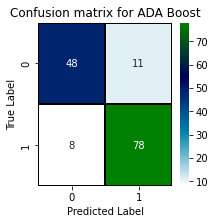

In [91]:
# Lets plot confusion matrix for ADA Boost
pred_ada=ada.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_ada)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for ADA Boost")
plt.show()

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr=LogisticRegression()

In [94]:
lr.fit(x_train,y_train)

LogisticRegression()

In [95]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:77.604167%


In [96]:
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:88.965517%
Classification report
               precision    recall  f1-score   support

           0       0.98      0.75      0.85        59
           1       0.85      0.99      0.91        86

    accuracy                           0.89       145
   macro avg       0.91      0.87      0.88       145
weighted avg       0.90      0.89      0.89       145



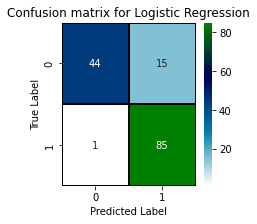

In [97]:
# Lets plot confusion matrix for Logistic Reg
pred_lr=lr.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_test,pred_lr)
x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]
f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(conf_mat,annot=True,linewidths=.2,linecolor="black",fmt=".0f",ax=ax,cmap="ocean_r",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for Logistic Regression")
plt.show()

# Cross Validation Score

### Finding best Cross validation value

In [98]:
pred_rf=rf.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=j)
    cv_score_mean=cv_score.mean()
    print("cv at ", j)
    print("Cross validation score is :-", cv_score_mean*100)
    print()

cv at  2
Cross validation score is :- 77.53616497383811

cv at  3
Cross validation score is :- 77.67634854771784

cv at  4
Cross validation score is :- 78.51058931860038

cv at  5
Cross validation score is :- 78.65038314176245

cv at  6
Cross validation score is :- 80.03328741965106

cv at  7
Cross validation score is :- 79.750346740638

cv at  8
Cross validation score is :- 78.50427350427351

cv at  9
Cross validation score is :- 79.19581618655693



We are getting minimum difference between testing accuracy and cross val score at cv=6

In [99]:
from sklearn.model_selection import cross_val_score

lssscore_selected=cross_val_score(svm,x,y,cv=6).mean()
print("the cross validation score for SVM is ",lssscore_selected)

lssscore_selected=cross_val_score(knn,x,y,cv=6).mean()
print("the cross validation score for KNN is ",lssscore_selected)

lssscore_selected=cross_val_score(ada,x,y,cv=6).mean()
print("the cross validation score for ADA is ",lssscore_selected)

lssscore_selected=cross_val_score(rf,x,y,cv=6).mean()
print("the cross validation score for RF is ",lssscore_selected)

lssscore_selected=cross_val_score(lr,x,y,cv=6).mean()
print("the cross validation score for LR is ",lssscore_selected)

the cross validation score for SVM is  0.7836891643709826
the cross validation score for KNN is  0.7517332415059688
the cross validation score for ADA is  0.7698576675849403
the cross validation score for RF is  0.8003443526170799
the cross validation score for LR is  0.7850780532598715


# Conclusion

We can observe that at random state 41 and cv=6

SVM

------Testing Accuracy:85.51 and Cross val score:78.36--------

Random Forest

------Testing Accuracy:84.82 and Cross val score:80.30--------

KNN

------Testing Accuracy:77.24 and Cross val score:75.17--------

ADA Boosting

------ Testing Accuracy:86.89 and Cross val score:76.98--------

Logistic Regression

------ Testing Accuracy:88.96 and Cross val score:78.50--------


# Plotting auc for all models

Text(0.5, 1.0, 'Recieving operating characterstics')

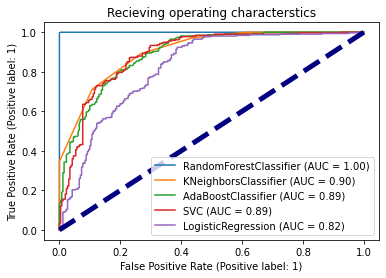

In [100]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


disp=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svm,x_train,y_train,ax=disp.ax_)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.plot([0,1],[0,1],color='navy',lw=5,linestyle='--')
plt.title('Recieving operating characterstics')


###    We can say that RANDOM fOREST is the best model as it has least difference between  testing accuracy and Cross validation Score, also have maximum AUC score

# Hyperparameter Tuning

In [106]:
from sklearn.model_selection import GridSearchCV

# RandomForestClassifier
params = {'criterion':["gini","entropy"],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[10,20,30,40,50],
             "min_samples_leaf":[2,3,4,5,6],
         'min_samples_split':[2,3,4,5,6,7,8]}

In [107]:
grd=GridSearchCV(estimator=rf,param_grid=params,n_jobs=-1)

In [108]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8]})

In [104]:
print('best_parameters',grd.best_params_)

best_parameters {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4}


In [110]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',min_samples_leaf=4)

In [111]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='auto',
                       min_samples_leaf=4)

In [112]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)

Accuracy score in training:84.722222%


In [113]:
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

Accuracy score in testing:88.965517%
Classification report
               precision    recall  f1-score   support

           0       0.94      0.78      0.85        59
           1       0.86      0.97      0.91        86

    accuracy                           0.89       145
   macro avg       0.90      0.87      0.88       145
weighted avg       0.89      0.89      0.89       145



In [114]:
lssscore_selected=cross_val_score(rf,x,y,cv=6).mean()*100
print("the cross validation score for RF is ",lssscore_selected)


the cross validation score for RF is  78.50665748393021


# Saving the best model

In [115]:
import pickle
pickle.dump(rf,open('classmodel_loan','wb'))